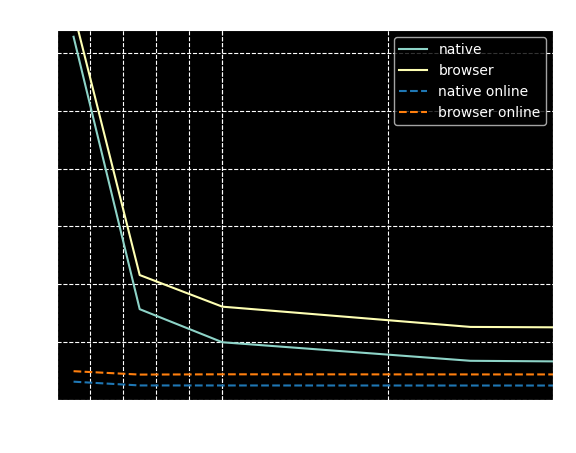

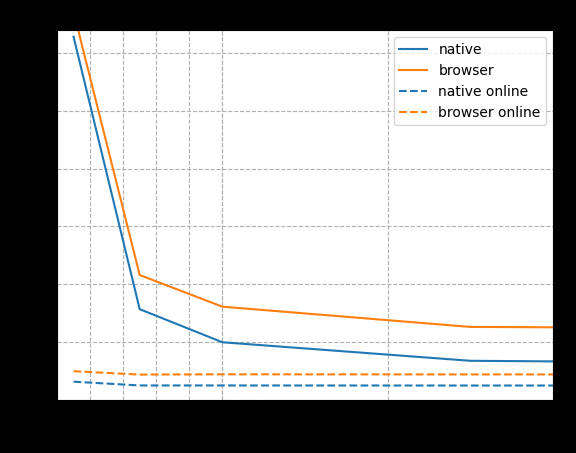

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd

for dark in [True, False]:
    plt.figure()
    if dark:
        plt.style.use("dark_background")
    else:
        plt.style.use("default")

    df_native = pd.read_csv("bandwidth.native.csv", header=0)
    df_browser = pd.read_csv("bandwidth.browser.csv", header=0)


    agg_total_native = df_native.groupby("bandwidth")["time_total"].mean().reset_index()
    agg_total_browser = df_browser.groupby("bandwidth")["time_total"].mean().reset_index()

    agg_online_native = df_native.groupby("bandwidth")["time_online"].mean().reset_index()
    agg_online_browser = df_browser.groupby("bandwidth")["time_online"].mean().reset_index()


    plt.plot(agg_total_native["bandwidth"], agg_total_native["time_total"]/1000.0, label="native")
    plt.plot(agg_total_browser["bandwidth"], agg_total_browser["time_total"]/1000.0, label="browser")
    plt.plot(agg_online_native["bandwidth"], agg_online_native["time_online"]/1000.0, label="native online", color='C0', linestyle='--')
    plt.plot(agg_online_browser["bandwidth"], agg_online_browser["time_online"]/1000.0, label="browser online", color='C1', linestyle='--')

    plt.xticks(list(range(0, 120, 20)) + list(range(100, 400, 100)) )
    plt.xlim(0, 300)
    plt.ylim(0, 32)
    
    plt.xlabel("Bandwidth (Mbps)")
    plt.ylabel("Runtime (sec)")
    plt.title("Upload bandwidth effect on protocol runtime")
    plt.legend(loc="upper right") 

    plt.grid(True, linestyle="--")

    svg_name = "bandwidth_dark.svg" if dark else "bandwidth_light.svg"
    plt.savefig(svg_name, bbox_inches="tight")

